In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data

# 텐서플로우 저장소에서 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


데이터 그려보기

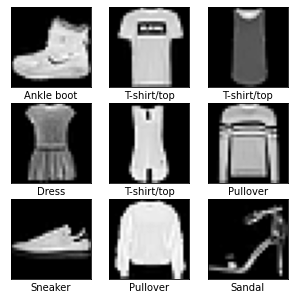

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

# Fashion-MNIST의 레이블에 해당하는 품목입니다.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
# 0 ~ 59999의 범위에서 무작위로 9개의 정수를 뽑습니다.
random_idx = np.random.randint(60000, size=sample_size) 

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = 'gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()


전처리 및 검증 데이터셋 만들기

In [ ]:
# 값의 범위를 0 ~ 1 사이로 만들기 -> 스케일링 -> minmax 알고리즘

x_train = x_train / 255
x_test = x_test / 255

print(x_train[0])

In [ ]:
# 레이블 (정답지) 범주형 데이터로 변경
from tensorflow.keras.utils import to_categorical

# 실제 정답 비교를 위해 0-9 정답지 따로 저장
real_y_test = y_test

# 각 데이터의 레이블을 범주형 형태로 변경
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# 검증 데이터 세트 만들기
from sklearn.model_selection import train_test_split

# 훈련/검증 데이터를 7:3 비율로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,
                                                  test_size=0.3,
                                                  random_state=777)

첫 번째 모델 구성하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

first_model = Sequential()

first_model.add(Flatten(input_shape=(28,28)))
#Flatten(28, 28)함수 -> .(28 * 28) -> 1차원 784로 변환

first_model.add(Dense(64, activation='relu'))
first_model.add(Dense(32, activation='relu'))
first_model.add(Dense(10, activation='softmax'))

첫 번째 모델 설정하기

In [ ]:
first_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

첫 번째 모델 학습하기

In [ ]:
first_history = first_model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(x_val,y_val)) # batch_size 64번 공부해라
                    # validation 쪽지시험 결과도 나옴

Epoch 1/30
329/329 [==============================] - 3s 6ms/step - loss: 0.6657 - accuracy: 0.7745 - val_loss: 0.4859 - val_accuracy: 0.8277
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4346 - accuracy: 0.8461 - val_loss: 0.4275 - val_accuracy: 0.8489
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3968 - accuracy: 0.8580 - val_loss: 0.3972 - val_accuracy: 0.8606
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3724 - accuracy: 0.8670 - val_loss: 0.3786 - val_accuracy: 0.8662
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3490 - accuracy: 0.8734 - val_loss: 0.3891 - val_accuracy: 0.8614
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3325 - accuracy: 0.8797 - val_loss: 0.3677 - val_accuracy: 0.8701
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3204 - accuracy: 0.8840 - val_loss: 0.3653 - val_accuracy: 0.8682
Epoch 

두 번째 모델 설정하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

second_model = Sequential()

second_model.add(Flatten(input_shape=(28,28)))
#Flatten(28, 28)함수 -> .(28 * 28) -> 1차원 784로 변환

second_model.add(Dense(64, activation='relu'))
second_model.add(Dense(32, activation='relu'))
second_model.add(Dense(10, activation='softmax'))

second_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

second_history = second_model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(x_val,y_val)) # batch_size 64번 공부해라
                    # validation 쪽지시험 결과도 나옴

Epoch 1/30
329/329 [==============================] - 2s 5ms/step - loss: 0.6580 - accuracy: 0.7775 - val_loss: 0.4616 - val_accuracy: 0.8403
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4397 - accuracy: 0.8476 - val_loss: 0.4213 - val_accuracy: 0.8533
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3980 - accuracy: 0.8587 - val_loss: 0.3851 - val_accuracy: 0.8666
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3661 - accuracy: 0.8682 - val_loss: 0.3692 - val_accuracy: 0.8710
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3492 - accuracy: 0.8734 - val_loss: 0.3650 - val_accuracy: 0.8741
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3332 - accuracy: 0.8793 - val_loss: 0.3489 - val_accuracy: 0.8745
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3170 - accuracy: 0.8852 - val_loss: 0.3393 - val_accuracy: 0.8803
Epoch 

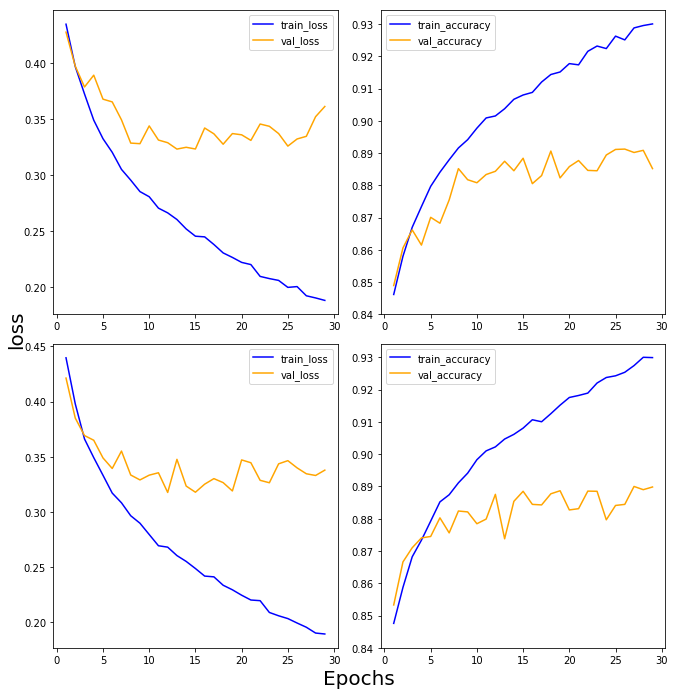

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys())
    
    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    # axis 선과 ax의 축 레이블을 제거합니다.
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i + 1)
        temp = keys[i%2]
        val_temp = keys[(i + 2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:], 
                     color = 'blue', label = 'train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:], 
                     color = 'orange', label = val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20)
    ax.set_xlabel('Epochs', size = 20)
    plt.tight_layout()
    plt.show()
    
draw_loss_acc(first_history, second_history, 30)


모델 평가하기

In [ ]:
print(first_model.evaluate(y_test,result))
print(second_model.evaluate(y_test,result))

NameError: ignored

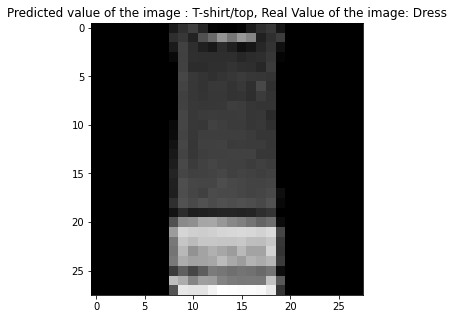

In [ ]:
import numpy as np

results = first_model.predict(x_test)
np.set_printoptions(precision=7) # numpy 소수점 제한

arg_results = np.argmax(results, axis = -1) # 가장 큰 값의 인덱스를 가져옵니다.

import matplotlib.pyplot as plt

sample_size = 10
# 0 ~ 9999의 범위에서 무작위로 정수를 뽑습니다.
random_idx = np.random.randint(10000) 

plt.figure(figsize = (5, 5))
plt.imshow(x_test[random_idx], cmap = 'gray')
plt.title('Predicted value of the image : ' 
          + class_names[arg_results[random_idx]] 
          + ', Real Value of the image: '+class_names[real_y_test[random_idx]])
plt.show()
